In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
import os

In [ ]:
lena = cv2.imread(r'C:\Users\Admin\Desktop\python\CS-K49-IPCV_LAB\Thien\LAB 2\lena.png', cv2.IMREAD_GRAYSCALE)
print(lena)
plt.imshow(lena, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
lena2 = cv2.copyMakeBorder(lena, 1, 1, 1, 1, cv2.BORDER_REPLICATE)
print(lena2)

plt.imshow(lena2, cmap='gray')
plt.axis('off')  
plt.show()

In [ ]:
def div(orignal,padding):
    hor_div = np.zeros(orignal.shape, dtype=float)
    ver_div = np.zeros(orignal.shape, dtype=float)

    for i in range(orignal.shape[0]):
        for j in range(orignal.shape[1]):
            hor_div[i, j] = padding[i, j+1] - padding[i, j]
            ver_div[i, j] = padding[i+1, j] - padding[i, j]
    return hor_div,ver_div

hor_div, ver_div = div(lena, lena2)

def grad_magnitude(hor_div, ver_div):
    grad_magnitude = np.sqrt(hor_div**2 + ver_div**2).astype(np.uint16)
    return grad_magnitude

lena_grad_magnitude = grad_magnitude(hor_div, ver_div)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(hor_div, cmap='gray')
plt.title('Horizontal')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ver_div, cmap='gray')
plt.title('Vertical')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(lena_grad_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.show()

In [5]:
def binary_segment(img, threshold):
    new_img = np.zeros(img.shape, dtype= img.dtype)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > threshold:
                new_img[i,j] = 255
    return new_img
fps = 25
frame_size = (lena.shape[1], lena.shape[0])
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('bai4.mp4', fourcc, fps, frame_size, isColor=True)

for i in range(10,241,10):
    video.write(cv2.cvtColor(binary_segment(lena_grad_magnitude, i), cv2.COLOR_GRAY2RGB))

video.release()

In [ ]:
bin_grad_magnitude = binary_segment(lena_grad_magnitude, 20)
plt.imshow(bin_grad_magnitude, cmap= "gray")
plt.axis("off")

In [ ]:
smooth_lena = cv2.GaussianBlur(lena, (5,5), sigmaX=100,sigmaY=100)

# Create edge-preserved smoothed version
smooth_lena_with_edge = np.copy(lena)
mask = (bin_grad_magnitude == 0)  # Get non-edge regions
smooth_lena_with_edge[mask] = smooth_lena[mask]  # Only smooth non-edge regions
# Display results
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(lena, cmap='gray')
plt.title('Lena')
plt.axis('off')

plt.subplot(132)
plt.imshow(smooth_lena, cmap='gray')
plt.title('smooth_lena')
plt.axis('off')

plt.subplot(133)
plt.imshow(smooth_lena_with_edge, cmap='gray')
plt.title('smooth_lena_with_edge_preservation')
plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
start = time.time()
grad_magnitude_canny = cv2.Canny(lena, 100, 100) # Canny
canny_run_time = time.time() - start

start = time.time()
sobel_Hor_div = np.absolute(cv2.Sobel(lena, cv2.CV_64F, 1, 0).astype(np.uint16))
sobel_Ver_div = np.absolute(cv2.Sobel(lena, cv2.CV_64F, 0, 1).astype(np.uint16))
grad_magnitude_sobel = grad_magnitude(sobel_Hor_div,sobel_Ver_div)
sobel_run_time = time.time() - start

start = time.time()
grad_magnitude_laplace = cv2.Laplacian(lena, cv2.CV_64F).astype(np.uint16) # Laplace
laplace_run_time = time.time() - start

start = time.time()
scharr_hor_div = np.absolute(cv2.Scharr(lena, cv2.CV_64F, 1, 0).astype(np.uint16))
scharr_ver_div = np.absolute(cv2.Scharr(lena, cv2.CV_64F, 0, 1).astype(np.uint16))
grad_magnitude_scharr = grad_magnitude(scharr_hor_div, scharr_ver_div) # Scharr
scharr_run_time = time.time() - start

start = time.time()
prewitt_kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
prewitt_kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(lena, -1, prewitt_kernelx)
img_prewitty = cv2.filter2D(lena, -1, prewitt_kernely)
grad_magnitude_prewitt = grad_magnitude(img_prewittx, img_prewitty)
prewitt_run_time = time.time() - start

start = time.time()
robert_kernelx = np.array([[1, 0], [0, -1]])
robert_kernely = np.array([[0, 1], [-1, 0]])
img_robertx = cv2.filter2D(lena, -1, robert_kernelx)
img_roberty = cv2.filter2D(lena, -1, robert_kernely)
grad_magnitude_robert = grad_magnitude(img_robertx, img_roberty)
robert_run_time = time.time() - start

Canny run time:  0.019562721252441406


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

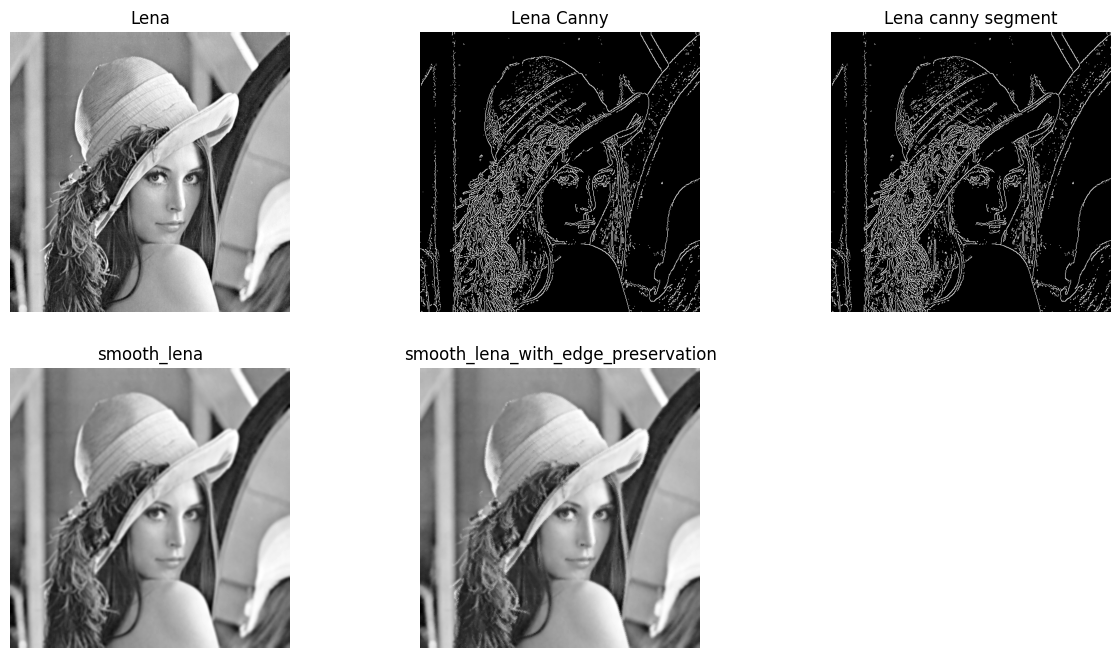

In [9]:
video_path = 'Bai7-Canny.mp4'
if not os.path.exists(video_path):
    fps = 25
    frame_size = (lena.shape[1], lena.shape[0])
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec video
    video = cv2.VideoWriter(video_path, fourcc, fps, frame_size)

    for i in range(10, 241, 10):
        video.write(cv2.cvtColor(binary_segment(grad_magnitude_canny, i), cv2.COLOR_GRAY2RGB))

    video.release()

bin_grad_canny = binary_segment(grad_magnitude_canny,20)

smooth_lena_with_edge = np.copy(lena)
mask = (bin_grad_canny == 0)  # Get non-edge regions
smooth_lena_with_edge[mask] = smooth_lena[mask]  # Only smooth non-edge regions

print("Canny run time: ", canny_run_time)
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1);plt.imshow(lena, cmap="gray");plt.title("Lena");plt.axis("off")
plt.subplot(2, 3, 2);plt.imshow(grad_magnitude_canny, cmap="gray");plt.title("Lena Canny");plt.axis("off")

plt.subplot(2, 3, 3);plt.imshow(grad_magnitude_canny, cmap="gray");plt.title("Lena canny segment");plt.axis("off")
plt.subplot(2, 3, 4);plt.imshow(smooth_lena, cmap="gray");plt.title("smooth_lena");plt.axis("off")
plt.subplot(2, 3, 5);plt.imshow(smooth_lena_with_edge, cmap="gray");plt.title("smooth_lena_with_edge_preservation");plt.axis("off")

Sobel run time:  0.015032291412353516


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

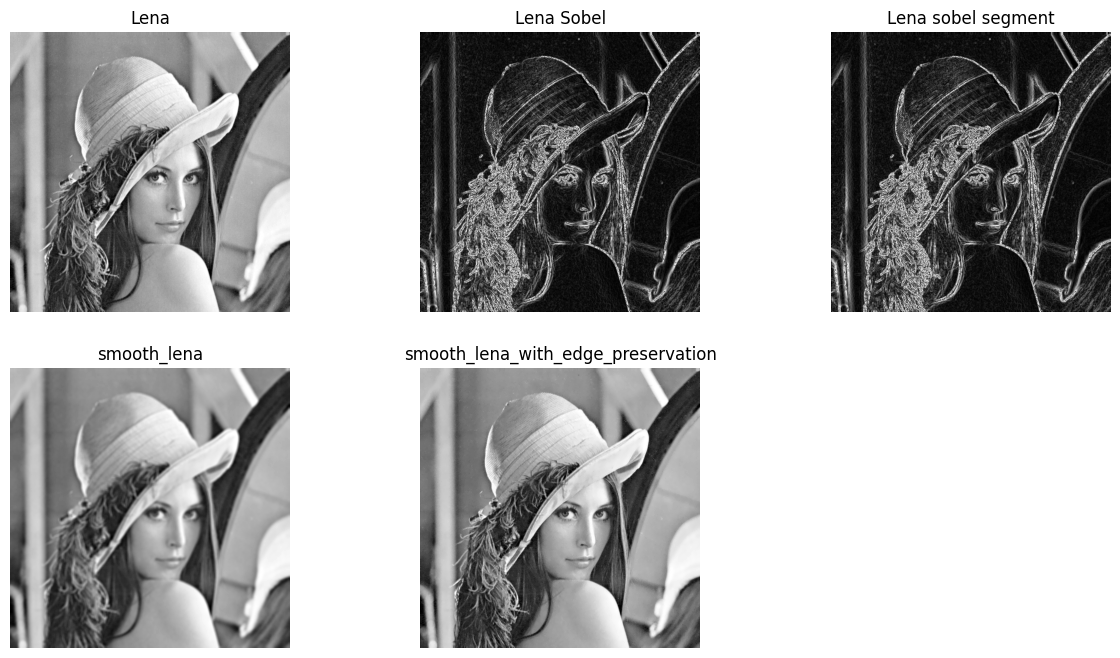

In [10]:
video_path = 'Bai7-Sobel.mp4'
if not os.path.exists(video_path):
    fps = 25
    frame_size = (lena.shape[1], lena.shape[0])
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec video
    video = cv2.VideoWriter(video_path, fourcc, fps, frame_size)

    for i in range(10, 241, 10):
        video.write(cv2.cvtColor(binary_segment(grad_magnitude_sobel, i), cv2.COLOR_GRAY2RGB))

    video.release()

bin_grad_sobel = binary_segment(grad_magnitude_sobel,20)

smooth_lena_with_edge = np.copy(lena)
mask = (bin_grad_sobel == 0)  # Get non-edge regions
smooth_lena_with_edge[mask] = smooth_lena[mask]  # Only smooth non-edge regions

print("Sobel run time: ", sobel_run_time)
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1);plt.imshow(lena, cmap="gray");plt.title("Lena");plt.axis("off")
plt.subplot(2, 3, 2);plt.imshow(grad_magnitude_sobel, cmap="gray");plt.title("Lena Sobel");plt.axis("off")

plt.subplot(2, 3, 3);plt.imshow(grad_magnitude_sobel, cmap="gray");plt.title("Lena sobel segment");plt.axis("off")
plt.subplot(2, 3, 4);plt.imshow(smooth_lena, cmap="gray");plt.title("smooth_lena");plt.axis("off")
plt.subplot(2, 3, 5);plt.imshow(smooth_lena_with_edge, cmap="gray");plt.title("smooth_lena_with_edge_preservation");plt.axis("off")

Laplace run time:  0.0045566558837890625


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

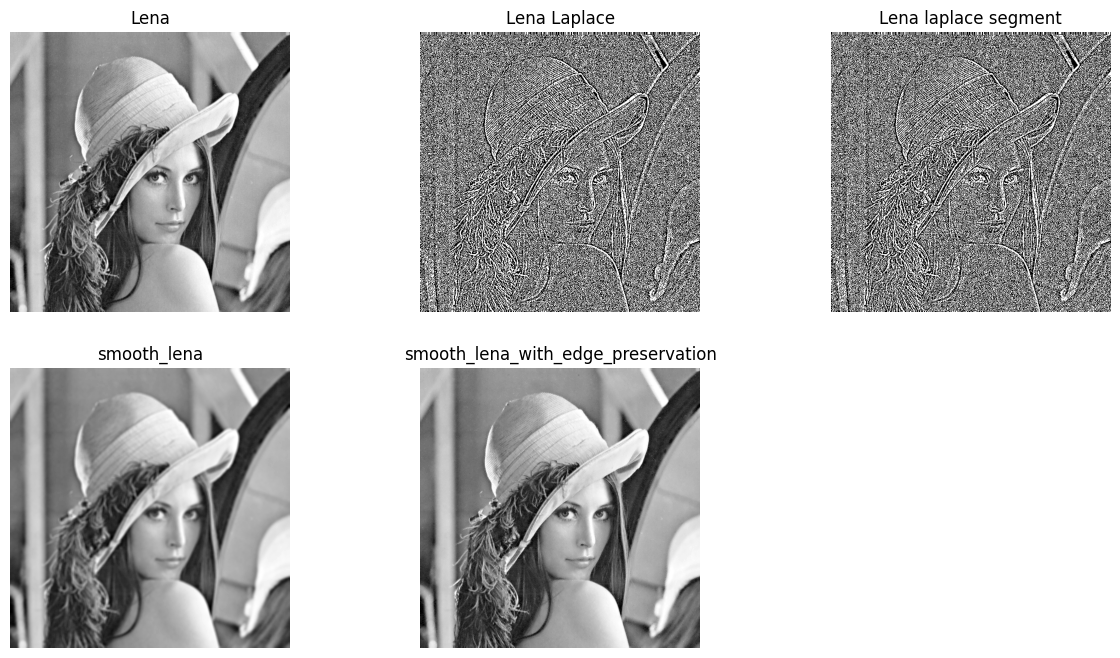

In [11]:
video_path = 'Bai7-Laplacian.mp4'
if not os.path.exists(video_path):
    fps = 25
    frame_size = (lena.shape[1], lena.shape[0])
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec video
    video = cv2.VideoWriter(video_path, fourcc, fps, frame_size)

    for i in range(10, 241, 10):
        video.write(cv2.cvtColor(binary_segment(grad_magnitude_laplace, i), cv2.COLOR_GRAY2RGB))

    video.release()

bin_grad_laplace = binary_segment(grad_magnitude_laplace,20)

smooth_lena_with_edge = np.copy(lena)
mask = (bin_grad_laplace == 0)  # Get non-edge regions
smooth_lena_with_edge[mask] = smooth_lena[mask]  # Only smooth non-edge regions

print("Laplace run time: ", laplace_run_time)
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1);plt.imshow(lena, cmap="gray");plt.title("Lena");plt.axis("off")
plt.subplot(2, 3, 2);plt.imshow(grad_magnitude_laplace, cmap="gray");plt.title("Lena Laplace");plt.axis("off")

plt.subplot(2, 3, 3);plt.imshow(grad_magnitude_laplace, cmap="gray");plt.title("Lena laplace segment");plt.axis("off")
plt.subplot(2, 3, 4);plt.imshow(smooth_lena, cmap="gray");plt.title("smooth_lena");plt.axis("off")
plt.subplot(2, 3, 5);plt.imshow(smooth_lena_with_edge, cmap="gray");plt.title("smooth_lena_with_edge_preservation");plt.axis("off")

Scharr run time:  0.008756875991821289


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

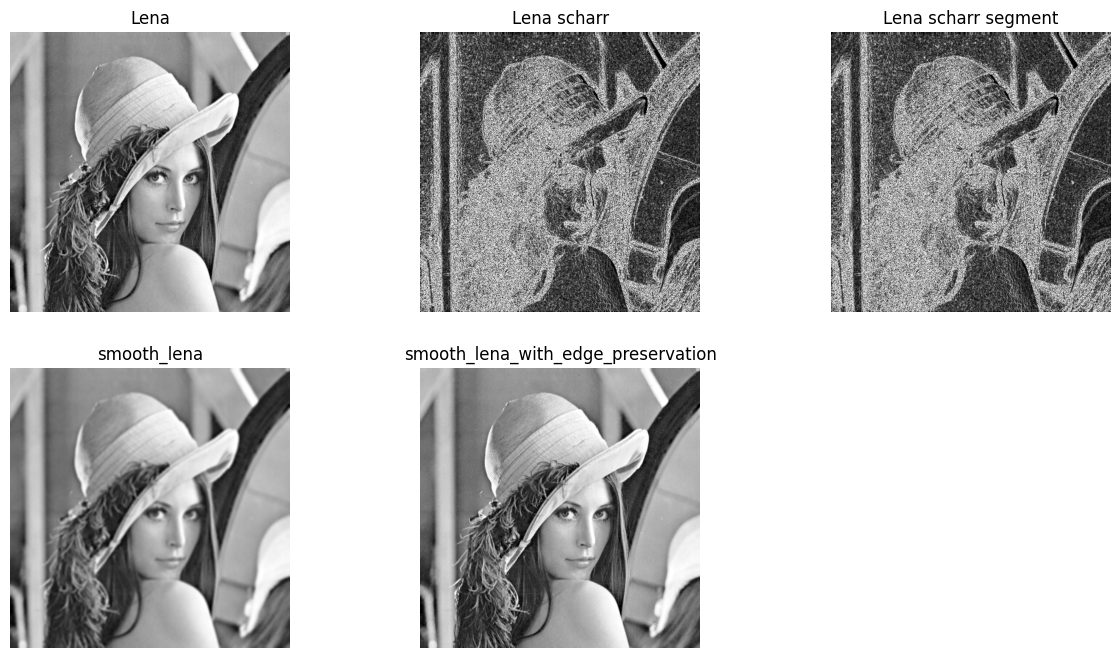

In [12]:
video_path = 'Bai7-Scharr.mp4'
if not os.path.exists(video_path):
    fps = 25
    frame_size = (lena.shape[1], lena.shape[0])
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec video
    video = cv2.VideoWriter(video_path, fourcc, fps, frame_size)

    for i in range(10, 241, 10):
        video.write(cv2.cvtColor(binary_segment(grad_magnitude_scharr, i), cv2.COLOR_GRAY2RGB))

    video.release()

bin_grad_scharr = binary_segment(grad_magnitude_scharr,20)

smooth_lena_with_edge = np.copy(lena)
mask = (bin_grad_scharr == 0)  # Get non-edge regions
smooth_lena_with_edge[mask] = smooth_lena[mask]  # Only smooth non-edge regions

print("Scharr run time: ", scharr_run_time)
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1);plt.imshow(lena, cmap="gray");plt.title("Lena");plt.axis("off")
plt.subplot(2, 3, 2);plt.imshow(grad_magnitude_scharr, cmap="gray");plt.title("Lena scharr");plt.axis("off")

plt.subplot(2, 3, 3);plt.imshow(grad_magnitude_scharr, cmap="gray");plt.title("Lena scharr segment");plt.axis("off")
plt.subplot(2, 3, 4);plt.imshow(smooth_lena, cmap="gray");plt.title("smooth_lena");plt.axis("off")
plt.subplot(2, 3, 5);plt.imshow(smooth_lena_with_edge, cmap="gray");plt.title("smooth_lena_with_edge_preservation");plt.axis("off")

Scharr run time:  0.0


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

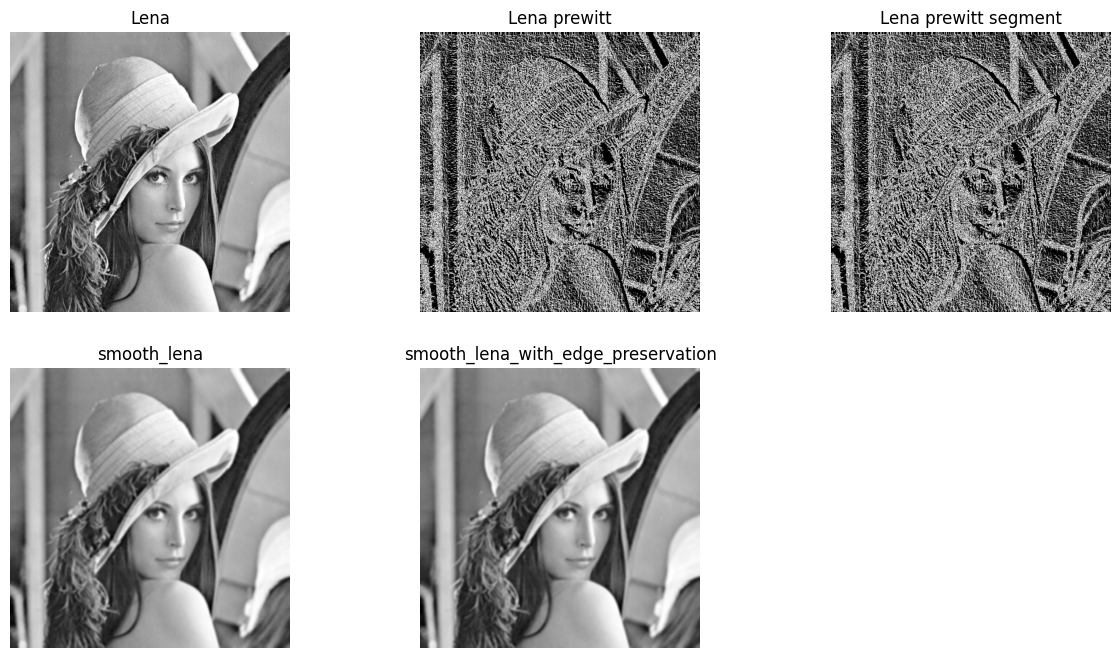

In [13]:
video_path = 'Bai7-Prewitt.mp4'
if not os.path.exists(video_path):
    fps = 25
    frame_size = (lena.shape[1], lena.shape[0])
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec video
    video = cv2.VideoWriter(video_path, fourcc, fps, frame_size)

    for i in range(10, 241, 10):
        video.write(cv2.cvtColor(binary_segment(grad_magnitude_prewitt, i), cv2.COLOR_GRAY2RGB))

    video.release()

bin_grad_prewitt = binary_segment(grad_magnitude_prewitt,20)

smooth_lena_with_edge = np.copy(lena)
mask = (bin_grad_prewitt == 0)  # Get non-edge regions
smooth_lena_with_edge[mask] = smooth_lena[mask]  # Only smooth non-edge regions

print("Scharr run time: ", prewitt_run_time)
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1);plt.imshow(lena, cmap="gray");plt.title("Lena");plt.axis("off")
plt.subplot(2, 3, 2);plt.imshow(grad_magnitude_prewitt, cmap="gray");plt.title("Lena prewitt");plt.axis("off")

plt.subplot(2, 3, 3);plt.imshow(grad_magnitude_prewitt, cmap="gray");plt.title("Lena prewitt segment");plt.axis("off")
plt.subplot(2, 3, 4);plt.imshow(smooth_lena, cmap="gray");plt.title("smooth_lena");plt.axis("off")
plt.subplot(2, 3, 5);plt.imshow(smooth_lena_with_edge, cmap="gray");plt.title("smooth_lena_with_edge_preservation");plt.axis("off")

Scharr run time:  0.016519784927368164


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

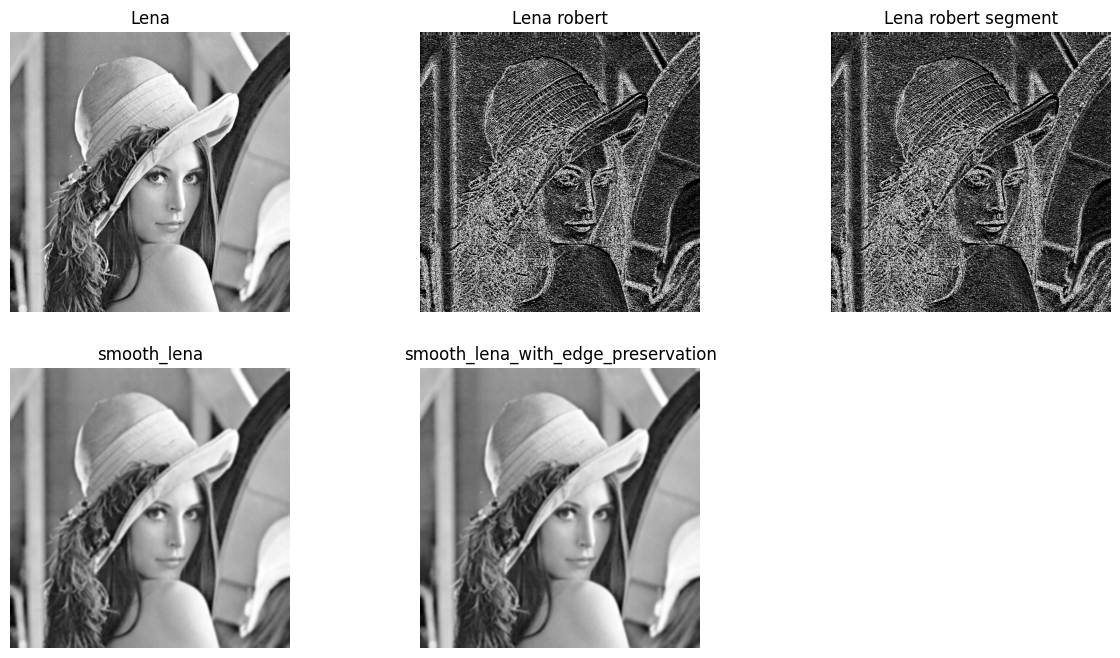

In [14]:
video_path = 'Bai7-Robert.mp4'
if not os.path.exists(video_path):
    fps = 25
    frame_size = (lena.shape[1], lena.shape[0])
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec video
    video = cv2.VideoWriter(video_path, fourcc, fps, frame_size)

    for i in range(10, 241, 10):
        video.write(cv2.cvtColor(binary_segment(grad_magnitude_robert, i), cv2.COLOR_GRAY2RGB))

    video.release()

bin_grad_robert = binary_segment(grad_magnitude_robert,20)

smooth_lena_with_edge = np.copy(lena)
mask = (bin_grad_robert == 0)  # Get non-edge regions
smooth_lena_with_edge[mask] = smooth_lena[mask]  # Only smooth non-edge regions

print("Scharr run time: ", robert_run_time)
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1);plt.imshow(lena, cmap="gray");plt.title("Lena");plt.axis("off")
plt.subplot(2, 3, 2);plt.imshow(grad_magnitude_robert, cmap="gray");plt.title("Lena robert");plt.axis("off")

plt.subplot(2, 3, 3);plt.imshow(grad_magnitude_robert, cmap="gray");plt.title("Lena robert segment");plt.axis("off")
plt.subplot(2, 3, 4);plt.imshow(smooth_lena, cmap="gray");plt.title("smooth_lena");plt.axis("off")
plt.subplot(2, 3, 5);plt.imshow(smooth_lena_with_edge, cmap="gray");plt.title("smooth_lena_with_edge_preservation");plt.axis("off")

[0.019562721252441406, 0.015032291412353516, 0.0, 0.016519784927368164, 0.008756875991821289, 0.0045566558837890625]


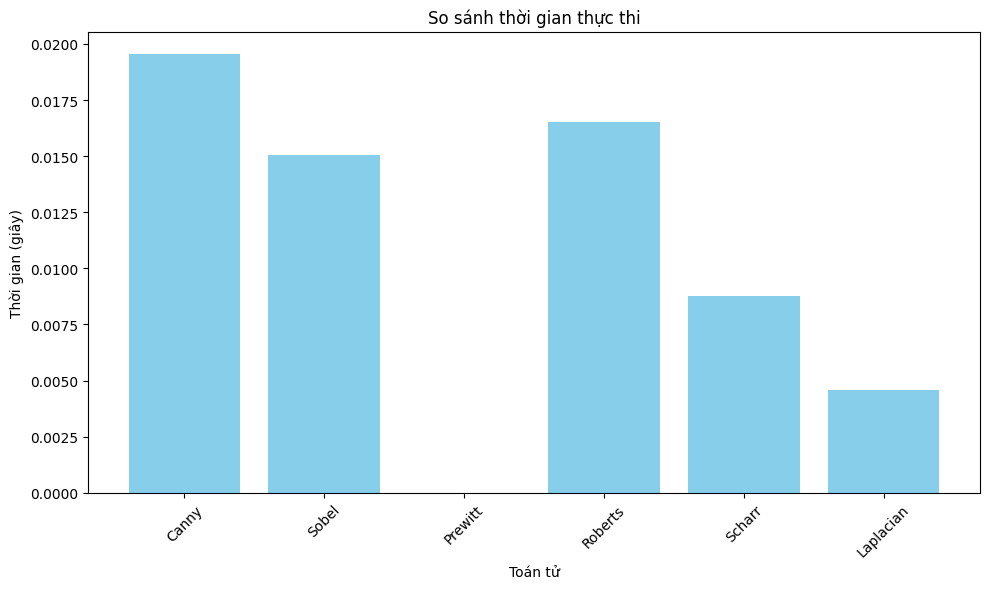

In [15]:
execution_times = [canny_run_time, sobel_run_time, prewitt_run_time, robert_run_time, scharr_run_time, laplace_run_time]
print(execution_times)
operators = ['Canny','Sobel', 'Prewitt','Roberts', 'Scharr','Laplacian']

plt.figure(figsize=(10,6))
plt.bar(operators, execution_times, color='skyblue')
plt.title('So sánh thời gian thực thi')
plt.xlabel('Toán tử')
plt.ylabel('Thời gian (giây)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

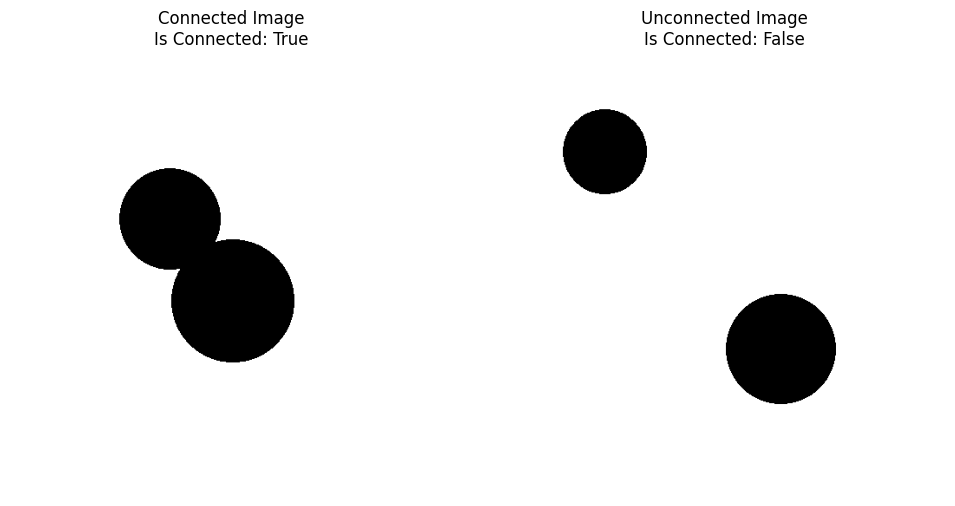

In [16]:
def check_black_connectivity(img):
    img_copy = img.copy()
    
    height, width = img.shape
    
    black_regions = 0
    
    for y in range(height):
        for x in range(width):
            if img_copy[y,x] == 0:
                black_regions += 1
                # Flood fill from this point with gray (128)
                cv2.floodFill(img_copy, None, (x,y), 128)
    
    return black_regions == 1 

connected = cv2.imread(r'C:\Users\Admin\Desktop\python\CS-K49-IPCV_LAB\Thien\LAB 2\connected.png', cv2.IMREAD_GRAYSCALE)
unconnected = cv2.imread(r'C:\Users\Admin\Desktop\python\CS-K49-IPCV_LAB\Thien\LAB 2\unconnected.png', cv2.IMREAD_GRAYSCALE)

# Check connectivity
connected_result = check_black_connectivity(connected)
unconnected_result = check_black_connectivity(unconnected)

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.imshow(connected, cmap='gray')
plt.title(f'Connected Image\nIs Connected: {connected_result}')
plt.axis('off')

plt.subplot(122)
plt.imshow(unconnected, cmap='gray')
plt.title(f'Unconnected Image\nIs Connected: {unconnected_result}')
plt.axis('off')

plt.tight_layout()
plt.show()